## Final Project Submission

### GROUP 4

Please fill out:
* Students name: **Beth Nyambura, Benson Ouma, Harrison Karime, Rahab Gachie**
* Student pace: **part time**
* Scheduled project review date/time: **29th March 2025, 11:59PM**
* Instructor name: **Brian Chacha**
* Blog post URL:


#  Movie Studio Strategy: Data-Driven Decisions for Box Office Success

##  Introduction

In an increasingly competitive content landscape, companies are investing heavily in original video production. Our company is launching a new movie studio and aims to enter this space strategically. However, lacking prior experience in film production, we must rely on data to identify what makes a movie successful.

This project leverages real-world movie data to explore what types of films perform best at the box office. Through structured analysis, we aim to generate insights that can inform content creation, budgeting, casting, and release strategies.

---
##  Business Understanding

###  Business Objective

Our primary business question is:

> **What types of films should our company produce to maximize success at the box office?**

To answer this, we explore several supporting questions:

1. **What are the current trends by genre in the box office?**  
   - Which genres dominate the market?

2. **What budget ranges are the most profitable?**  
   - How can we optimize spending without compromising success?

3. **Which directors and actors consistently attract larger audiences?**  
   - Who are the “bankable names” we should work with?

4. **What is the average length (runtime) of films that perform well?**  
   - Is there an ideal duration for maximizing audience engagement?

Our goal is to convert findings from these questions into **three actionable business recommendations**.

---

## Data Understanding 
An explorative data analysis was done using the following data sets from various sources, to answer our questions.
1. bom.movie_gross.csv.gz
2. im.db.zip
3. tn.movie_budgets.csv.gz
4. tmdb.movies.csv.gz

The data was loaded and previewed and thereafter prepared for analysis by doing the following;
- checking the shape, column names and data types. 
- Identify missing values and duplicates.
- Filling in the missing values using appropriate methods.
- Dropping rows with missing values.
- Changing string data type to float to enable mathematical calculations.


### Data Analysis

In [55]:
# Import the necessary libraries
import pandas as pd
import sqlite3 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

#### Loading the DataSets 

1. Loading the BOM dataset

In [56]:
# Load the compressed BOM dataset
df_bom = pd.read_csv(("zippedData/bom.movie_gross.csv.gz"), compression='gzip')

# Display the first few rows to inspect the data
df_bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


2. Loading the IMDB database

In [57]:
import zipfile

# Define the path to the ZIP file
zip_path = "zippedData/im.db.zip"
extract_path = "extractedimdb"

# Open and extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("ZIP file extracted successfully!")


ZIP file extracted successfully!


In [58]:
# opening im.db file 

conn = sqlite3.connect('extractedimdb/im.db')
cursor = conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
tables

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [59]:
querry_imdb = """
SELECT
    mb.movie_id,
    mb.primary_title,
    mb.start_year,
    mb.runtime_minutes,
    mb.genres,
    mr.averagerating,
    mr.numvotes,
    p_dir.primary_name AS director_name,
    p_writer.primary_name AS writer_name
FROM movie_basics mb
LEFT JOIN movie_ratings mr ON mb.movie_id = mr.movie_id
LEFT JOIN directors d ON mb.movie_id = d.movie_id
LEFT JOIN persons p_dir ON d.person_id = p_dir.person_id
LEFT JOIN writers AS w ON mb.movie_id = w.movie_id
LEFT JOIN persons AS p_writer ON w.person_id = p_writer.person_id
WHERE numvotes >= 1000

"""

df_imdb = pd.read_sql(querry_imdb, conn)

df_imdb.head()

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,director_name,writer_name
0,tt1043726,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",4.2,50352,Renny Harlin,Renny Harlin
1,tt1043726,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",4.2,50352,Renny Harlin,Daniel Giat
2,tt1043726,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",4.2,50352,Renny Harlin,Sean Hood
3,tt1043726,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",4.2,50352,Renny Harlin,Giulio Steve
4,tt1043726,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",4.2,50352,Renny Harlin,Renny Harlin


3. Loading tn.Movie_budgets

In [60]:
df_budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
df_budget.head() 


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


4. Loading in tmdb.movies.csv.gz

In [61]:
# open tmdb.movis.csv 

df_movies= pd.read_csv('zippedData/tmdb.movies.csv.gz')

df_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


#### Cleaning and preparation of the data sets

**1. BOM data set**

In [62]:
# Check data types
print(df_bom.info())

# Check for missing values
print(df_bom.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


In [63]:
df_bom.columns = df_bom.columns.str.lower().str.replace(' ', '_')
print(df_bom.columns)

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')


In [64]:
#checking for duplicates
duplicates=df_bom.duplicated().sum()
print(duplicates)
# filling rows with missing studio values
df_bom['studio'].fillna('unknowm',inplace=True)
#Drop rows with missing domestic_gross values
df_bom.dropna(subset=['domestic_gross'], inplace=True)


0


C:\Users\njeri\AppData\Local\Temp\ipykernel_15480\2389900619.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bom['studio'].fillna('unknowm',inplace=True)


In [65]:
# Remove commas and convert to float
df_bom['foreign_gross'] = df_bom['foreign_gross'].str.replace(',', '', regex=True)
df_bom['foreign_gross'] = pd.to_numeric(df_bom['foreign_gross'], errors='coerce')

# Check for any remaining NaNs after conversion
print(df_bom['foreign_gross'].isnull().sum())

1350


In [66]:
#replacing nan values in foreign_gross
df_bom['foreign_gross']=df_bom['foreign_gross'].replace(np.nan,0)
# Check for any remaining NaNs after replacing
print(df_bom['foreign_gross'].isnull().sum())


0


**2. im.db.zip**

In [67]:
#CLeaning the imdb_2 df

# drop rows missing values
imdb_df_clean2 = df_imdb.dropna(subset=['runtime_minutes', 'genres', 'director_name', 'writer_name'])

# keep movies with votes > 1000
imdb_df_clean2 = imdb_df_clean2[imdb_df_clean2['numvotes'] >= 1000]

# filter out extreme runtimes
imdb_df_clean2 = imdb_df_clean2[(imdb_df_clean2['runtime_minutes'] >= 30) & (imdb_df_clean2['runtime_minutes'] <= 240)]

# extract main genre
imdb_df_clean2['genre_main'] = imdb_df_clean2['genres'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)

# Create a decade column
imdb_df_clean2['decade'] = (imdb_df_clean2['start_year'] // 10) * 10

imdb_df_clean2.head()

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,director_name,writer_name,genre_main,decade
0,tt1043726,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",4.2,50352,Renny Harlin,Renny Harlin,Action,2010
1,tt1043726,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",4.2,50352,Renny Harlin,Daniel Giat,Action,2010
2,tt1043726,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",4.2,50352,Renny Harlin,Sean Hood,Action,2010
3,tt1043726,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",4.2,50352,Renny Harlin,Giulio Steve,Action,2010
4,tt1043726,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",4.2,50352,Renny Harlin,Renny Harlin,Action,2010


In [68]:
# Looking into our cleaned imd_df2

print(imdb_df_clean2.info())
print("Shape of the dataset")
print(imdb_df_clean2.shape)
print()
print("The columns on the dataset:\n", imdb_df_clean2.columns)
print()
print("The sum of missing values", imdb_df_clean2.isnull().sum())
print()


<class 'pandas.core.frame.DataFrame'>
Index: 1793938 entries, 0 to 1794478
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   movie_id         object 
 1   primary_title    object 
 2   start_year       int64  
 3   runtime_minutes  float64
 4   genres           object 
 5   averagerating    float64
 6   numvotes         int64  
 7   director_name    object 
 8   writer_name      object 
 9   genre_main       object 
 10  decade           int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 164.2+ MB
None
Shape of the dataset
(1793938, 11)

The columns on the dataset:
 Index(['movie_id', 'primary_title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes', 'director_name', 'writer_name',
       'genre_main', 'decade'],
      dtype='object')

The sum of missing values movie_id           0
primary_title      0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes      

**3. tn.movie_budgets.csv.gz**

In [69]:
# check for missing values
df_budget.info()
df_budget.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [70]:
# check for 0 values in the monetary columns which might indicate missing data even if there are no NULL values
budget_col = (df_budget['production_budget'] == '$0').sum()
domestic_col = (df_budget['domestic_gross'] == '$0').sum()
worldwide_col = (df_budget['worldwide_gross'] == '$0').sum()

print("Zero values in monetary columns:")
print(f"Production budget: {budget_col}")
print(f"Domestic gross: {domestic_col}")
print(f"Worldwide gross: {worldwide_col}")

Zero values in monetary columns:
Production budget: 0
Domestic gross: 548
Worldwide gross: 367


In [71]:
# clean and convert monetary values to float
# identify monetary columns
monetary_columns = ["production_budget", "domestic_gross", "worldwide_gross"]
# clean the monetary_columns
for col in monetary_columns:
    df_budget[col] = df_budget[col].replace('[$,]', '', regex=True).astype(float)
print(df_budget.dtypes)

id                     int64
release_date          object
movie                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object


In [72]:
# Replace the 0 values with the mean gross movies released in the same year

df_budget['release_year'] = df_budget['release_date'].str.split(', ').str[-1]
 
 # replace missing values with mean
def monetary_columns(*cols):
    return list(cols)
for col in monetary_columns('domestic_gross', 'worldwide_gross'):  
    df_budget[col] = df_budget.groupby('release_year')[col].transform(lambda x: x.fillna(x.mean()))
 
print(df_budget[['movie', 'release_date', 'domestic_gross', 'worldwide_gross']].head())
df_budget.isnull().sum()

                                         movie  release_date  domestic_gross  \
0                                       Avatar  Dec 18, 2009     760507625.0   
1  Pirates of the Caribbean: On Stranger Tides  May 20, 2011     241063875.0   
2                                 Dark Phoenix   Jun 7, 2019      42762350.0   
3                      Avengers: Age of Ultron   May 1, 2015     459005868.0   
4            Star Wars Ep. VIII: The Last Jedi  Dec 15, 2017     620181382.0   

   worldwide_gross  
0     2.776345e+09  
1     1.045664e+09  
2     1.497624e+08  
3     1.403014e+09  
4     1.316722e+09  


id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
release_year         0
dtype: int64

**4. tmdb.movies.csv.gz**

In [73]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [74]:
# Drop the 'Unnamed: 0' column if it exists
if "Unnamed: 0" in df_movies.columns:
    df_movies = df_movies.drop(columns=["Unnamed: 0"])
else:
    df_movies = df_movies.copy() 

# Convert release_date to datetime
df_movies["release_date"] = pd.to_datetime(df_movies["release_date"], errors="coerce")

# Check for missing values
missing_values = df_movies.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

# Check rows where vote_count is zero or very low
low_vote_movies = df_movies[df_movies["vote_count"] < 10]
print("\nMovies with very low vote count:\n", low_vote_movies.head())

# Check movies with zero popularity
zero_popularity_movies = df_movies[df_movies["popularity"] == 0]
print("\nMovies with zero popularity:\n", zero_popularity_movies.head())

# Drop movies with vote_average < 4
df_movies = df_movies[df_movies["vote_average"] >= 4]

# Drop movies with vote_count < 100
df_movies = df_movies[df_movies["vote_count"] >= 100]

# Reset index after dropping rows
df_movies = df_movies.reset_index(drop=True)

# Display the number of remaining rows and the first few cleaned records
print("\nShape of Cleaned Dataset (Rows, Columns):", df_movies.shape)
print("\nFirst 5 Rows of Cleaned Dataset:\n", df_movies.head())

Missing Values in Each Column:
 genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

Movies with very low vote count:
         genre_ids     id original_language  \
481          [18]  66111                en   
483  [27, 28, 53]  44224                en   
505   [18, 10749]  63414                te   
552      [12, 28]  45611                en   
554  [80, 18, 53]  39478                en   

                                  original_title  popularity release_date  \
481                                       Luster       4.309   2010-12-12   
483                                         Bear       4.288   2010-01-01   
505                                    డార్లింగ్       4.029   2010-04-23   
552  Jack Hunter and the Lost Treasure of Ugarit       3.471   2010-07-31   
554                               Stripped Naked   

### Answering the Business Questions

**1. What are the current trends by genre in the box office?**

Text(0.5, 1.0, 'Average Rating by Genre and Decade')

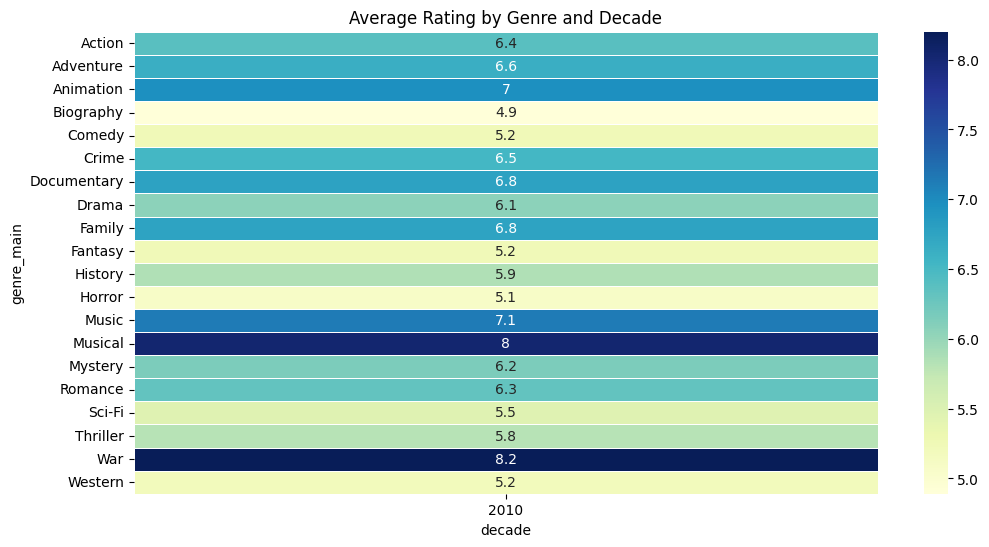

In [75]:
# Average rating by genre and decade
pivot = imdb_df_clean2.pivot_table(index='genre_main', columns='decade', values='averagerating', aggfunc='mean')
plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Average Rating by Genre and Decade')

From the above we deduce that the top 3 genres are War, Musical and Animation genres respectively

2. What budget ranges are the most profitable? 

In [76]:
# check for correlation between the production budget and worldwide gross

correlation = df_budget['production_budget'].corr(df_budget['worldwide_gross'])
correlation

np.float64(0.7483059765694753)

##### The correlation coefficient of 0.75 indicates that there is a strong positive linear relationship between the production budget and the worldwide gross which means that the higher the production budget is, the higher the worldwide gross sales will be.

##### Finding what the optimal budget for the production of a movie is to maximize on the Return on investment (ROI)

In [77]:
# calculate the ROI
df_budget['ROI'] = df_budget['worldwide_gross'] / df_budget['production_budget']
df_budget.loc[df_budget['production_budget'] == 0, 'ROI'] = np.nan
print(df_budget[['movie', 'production_budget', 'worldwide_gross', 'ROI']].head())

                                         movie  production_budget  \
0                                       Avatar        425000000.0   
1  Pirates of the Caribbean: On Stranger Tides        410600000.0   
2                                 Dark Phoenix        350000000.0   
3                      Avengers: Age of Ultron        330600000.0   
4            Star Wars Ep. VIII: The Last Jedi        317000000.0   

   worldwide_gross       ROI  
0     2.776345e+09  6.532577  
1     1.045664e+09  2.546673  
2     1.497624e+08  0.427892  
3     1.403014e+09  4.243841  
4     1.316722e+09  4.153696  


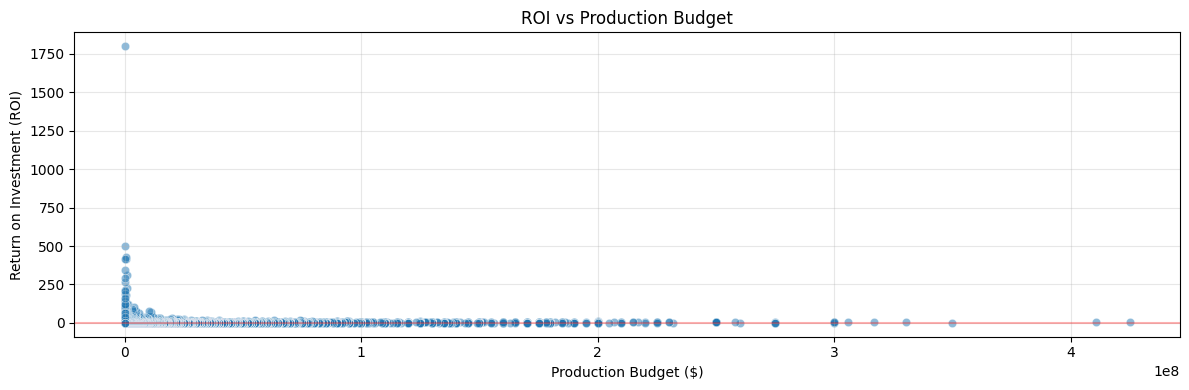

In [78]:
# scatter plot of ROI vs production_budget
plt.figure(figsize=(12, 4))
sns.scatterplot(x='production_budget', y='ROI', data=df_budget, alpha=0.5)
plt.title('ROI vs Production Budget')
plt.xlabel('Production Budget ($)')
plt.ylabel('Return on Investment (ROI)')
plt.axhline(y=1, color='r', linestyle='-', alpha=0.3)  # Line at ROI = 1 (break-even)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


 The scatter plot shows the relationship between the ROI and the production budget. The ROI decreases as the production budget increases.

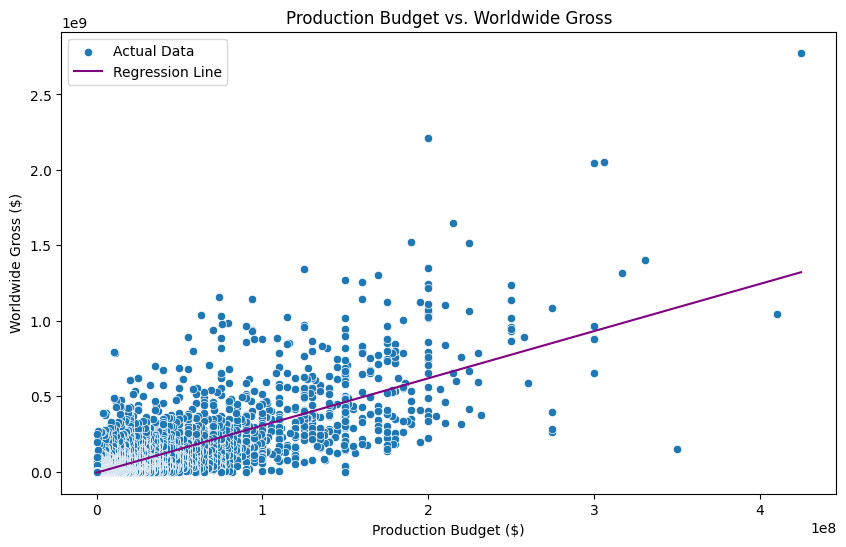

In [79]:
X = df_budget['production_budget'].values.reshape(-1, 1) # independent variable
y = df_budget['worldwide_gross'].values.reshape(-1, 1) #dependent variable

# linear regression model
model = LinearRegression()
model.fit(X, y)

df_budget['predicted_gross'] = model.predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_budget["production_budget"], y=df_budget["worldwide_gross"], label="Actual Data")
sns.lineplot(x=df_budget["production_budget"], y=df_budget["predicted_gross"], color="purple", label="Regression Line")
plt.xlabel("Production Budget ($)")
plt.ylabel("Worldwide Gross ($)")
plt.title("Production Budget vs. Worldwide Gross")
plt.legend()
plt.show()

In [80]:
optimal_budget = df_budget.loc[df_budget["predicted_gross"].idxmax(), "production_budget"]
optimal_budget

np.float64(425000000.0)

According to the above analysis, the optimal budget for movie production is $425,000,000 million.


C:\Users\njeri\AppData\Local\Temp\ipykernel_15480\4264336877.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  roi_by_bin = df_budget.groupby('budget_bin')['ROI'].mean().reset_index()


                   budget_bin       ROI
0           (0.0, 50000000.0]  5.260980
1   (50000000.0, 100000000.0]  2.594578
2  (100000000.0, 150000000.0]  3.076560
3  (150000000.0, 200000000.0]  3.325806
4  (200000000.0, 250000000.0]  3.523907
5  (250000000.0, 300000000.0]  2.822800
6  (300000000.0, 350000000.0]  3.883899
7  (350000000.0, 400000000.0]       NaN
8  (400000000.0, 450000000.0]  4.539625


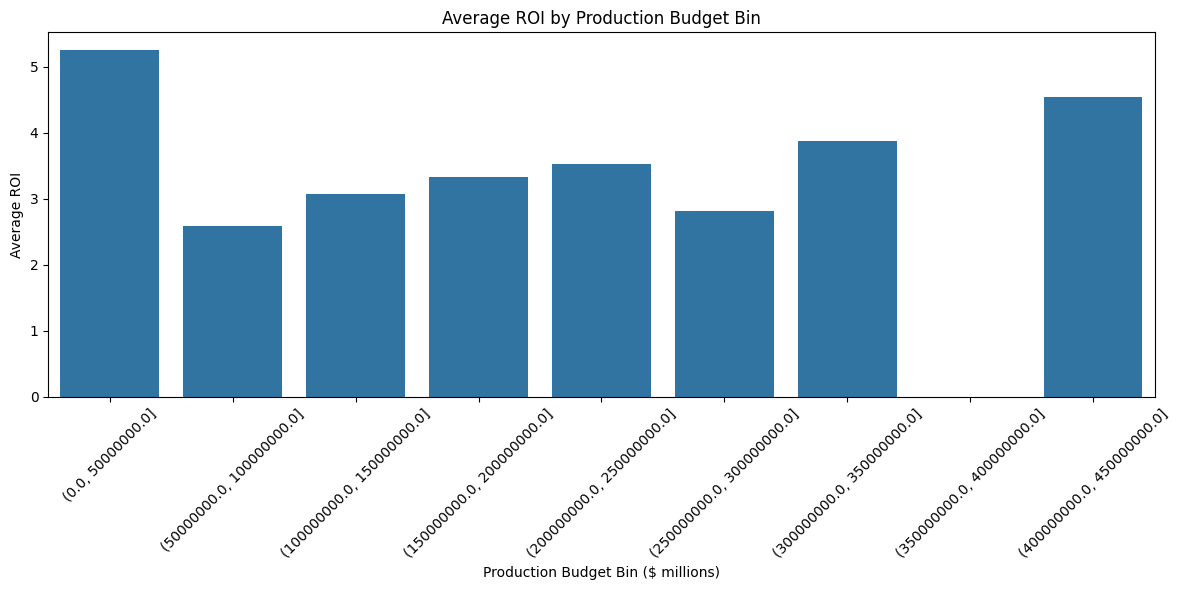

In [81]:
# Create budget bins (in $ millions) for analysis
bin_edges = np.arange(0, df_budget['production_budget'].max() + 50e6, 50e6)  
df_budget['budget_bin'] = pd.cut(df_budget['production_budget'], bins=bin_edges)

# Calculate average ROI per budget bin
roi_by_bin = df_budget.groupby('budget_bin')['ROI'].mean().reset_index()
print(roi_by_bin)

# Plotting average ROI vs budget bins
plt.figure(figsize=(12,6))
ax = sns.barplot(data=roi_by_bin, x='budget_bin', y='ROI')
plt.xticks(rotation=45)
plt.xlabel('Production Budget Bin ($ millions)')
plt.ylabel('Average ROI')
plt.title('Average ROI by Production Budget Bin')
plt.tight_layout()
plt.show()

The analysis shows that there are no movies in the 350-400 million budget range. The first budget bin of up to $50,000,000 million has the highest ROI performance making it the most ideal budget range.


In [82]:
# Load budget data (example)
budget_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip')

# Clean budget and gross columns (convert to numeric)
budget_df['production_budget'] = budget_df['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
budget_df['worldwide_gross'] = budget_df['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)

# Calculate profit
budget_df['profit'] = budget_df['worldwide_gross'] - budget_df['production_budget']

# Bin budgets into ranges
bins = [0, 50000000, 100000000, 200000000, float('inf')]
labels = ['$0–$50M', '$50M–$100M', '$100M–$200M', '$200M+']
budget_df['budget_range'] = pd.cut(budget_df['production_budget'], bins=bins, labels=labels)

# Aggregate profit by budget range
profit_by_budget = budget_df.groupby('budget_range')['profit'].agg(['mean', 'count']).reset_index()
profit_by_budget.columns = ['Budget_Range', 'Average_Profit', 'Movie_Count']

# Display results
print(profit_by_budget.sort_values(by='Average_Profit', ascending=False))

  Budget_Range  Average_Profit  Movie_Count
3       $200M+    6.413884e+08           41
2  $100M–$200M    3.195766e+08          322
1   $50M–$100M    1.153222e+08          718
0      $0–$50M    2.857650e+07         4701


C:\Users\njeri\AppData\Local\Temp\ipykernel_15480\915916094.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profit_by_budget = budget_df.groupby('budget_range')['profit'].agg(['mean', 'count']).reset_index()


1.High-Budget Movies ($200M+) :     High-Budget Movies ($200M+) :
        Average Profit : $641.4 million
        Observations :
            These movies generate the highest average profit.
            However, they are relatively rare (only 41 movies in this range).
            High-budget movies often include blockbuster franchises (e.g., Marvel Cinematic Universe, Star Wars) that appeal to global audiences.

2.Mid-High Budget Movies (100M–200M) :
        Average Profit : $319.6 million
        Observations :
            These movies also perform well, with a higher average profit than lower-budget ranges.
            There are more movies in this range (322), indicating it's a popular budget tier for studios aiming for both domestic and international success.

3.Mid-Low Budget Movies (50M–100M) :
        Average Profit : $115.3 million
        Observations :
            These movies have a moderate profit margin but are much more common (718 movies).
            This range is often used for mid-tier blockbusters or films with strong marketing campaigns.
            
4.Low-Budget Movies (0–50M) :
        Average Profit : $28.6 million
        Observations :
            While these movies dominate in terms of quantity (4,701 movies), their average profit is significantly lower.
            This range includes independent films, niche genres, and smaller studio productions.
            Low-budget movies may not always aim for box office dominance but can still achieve profitability through targeted releases or streaming platforms.



**3. Which directors and writers consistently attract large audiences.**

In this query, we aim to identify the top-performing film directors based on two key metrics:
- **Average IMDB rating** of their films
- **Total number of votes**, which reflects audience reach or popularity
To ensure reliability and relevance, we apply two filters:
1. Only include movies that have **at least 1000 votes**, so we focus on widely seen films.
2. Only include directors who have directed **at least 3 such movies**, to ensure enough data per director.

In [83]:
# Top directors based on popularity score and rating 
query_top_directors = """
SELECT 
    p.primary_name AS director_name,
    COUNT(mb.movie_id) AS movie_count,
    ROUND(AVG(mr.averagerating), 2) AS avg_rating,
    SUM(mr.numvotes) AS total_votes
FROM directors d
JOIN persons p ON d.person_id = p.person_id
JOIN movie_basics mb ON d.movie_id = mb.movie_id
JOIN movie_ratings mr ON mb.movie_id = mr.movie_id
WHERE mr.numvotes >= 1000
GROUP BY director_name
HAVING COUNT(mb.movie_id) >= 3  -- filter to active directors
ORDER BY avg_rating DESC, total_votes DESC;
"""

top_directors_df = pd.read_sql(query_top_directors, conn)
top_directors_df.head()

,director_name,movie_count,avg_rating,total_votes
0,Amitabh Reza Chowdhury,3,9.3,55410
1,Mahesh Manjrekar,3,9.2,12891
2,Putrama Tuta,4,9.1,16648
3,Bayu Skak,3,9.0,8976
4,Fajar Nugros,3,9.0,8976


We begin by identifying the **top 20 directors** with the highest average ratings across their movies. This gives insight into who consistently produces well-rated content.

We then use a **scatter plot** to explore the relationship between average rating and total audience votes across all directors. This helps us identify directors who are both **critically acclaimed and popular**—valuable insights for casting or collaboration decisions.

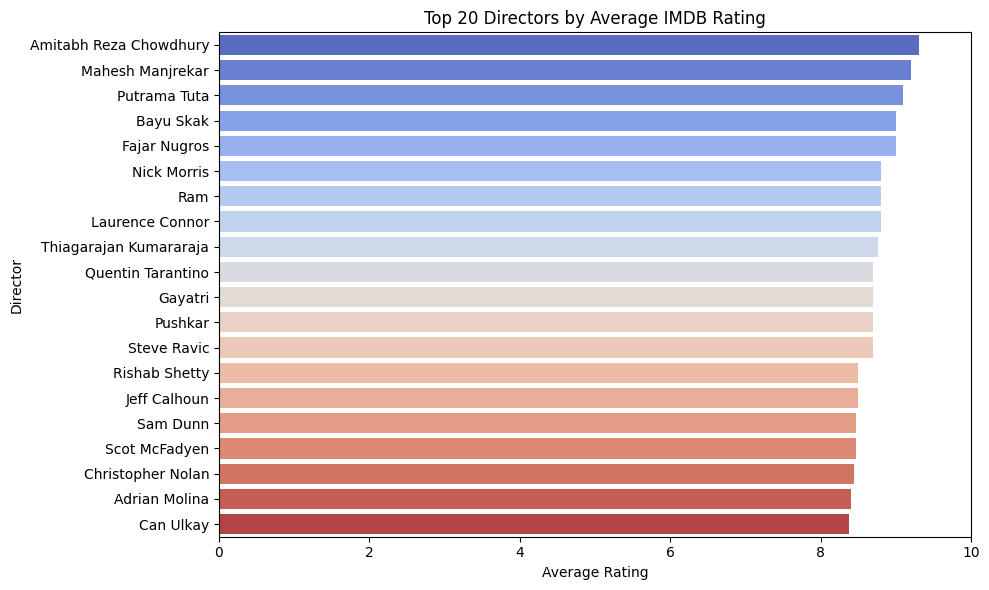

In [84]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_directors_df.head(20), x='avg_rating', y='director_name', palette='coolwarm', hue='director_name', legend=False)
plt.title('Top 20 Directors by Average IMDB Rating')
plt.xlabel('Average Rating')
plt.ylabel('Director')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()

 Querying Top Performing Writers
In this query, we aim to identify the top-performing film directors based on two key metrics:
- **Average IMDB rating** of their films
- **Total number of votes**, which reflects audience reach or popularity

In [85]:
#top_writers

query_top_writers = """
SELECT 
    p.primary_name AS writer_name,
    COUNT(mb.movie_id) AS movie_count,
    ROUND(AVG(mr.averagerating), 2) AS avg_rating,
    SUM(mr.numvotes) AS total_votes
FROM writers w
JOIN persons p ON w.person_id = p.person_id
JOIN movie_basics mb ON w.movie_id = mb.movie_id
JOIN movie_ratings mr ON mb.movie_id = mr.movie_id
WHERE mr.numvotes >= 1000  -- Filter to widely rated movies
GROUP BY writer_name
HAVING COUNT(mb.movie_id) >= 3  -- Writers with 3+ qualifying movies
ORDER BY avg_rating DESC, total_votes DESC
LIMIT 20;
"""

top_writers_df = pd.read_sql(query_top_writers, conn)
top_writers_df.info(), top_writers_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   writer_name  20 non-null     object 
 1   movie_count  20 non-null     int64  
 2   avg_rating   20 non-null     float64
 3   total_votes  20 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 772.0+ bytes


(None,
            writer_name  movie_count  avg_rating  total_votes
 0  Anjana Krishnakumar            3        9.40        28887
 1                  Ram            4        8.95        29977
 2    Quentin Tarantino            4        8.68      1655377
 3          Steve Ravic            4        8.60         5148
 4          Vetrimaaran            3        8.40        14699)

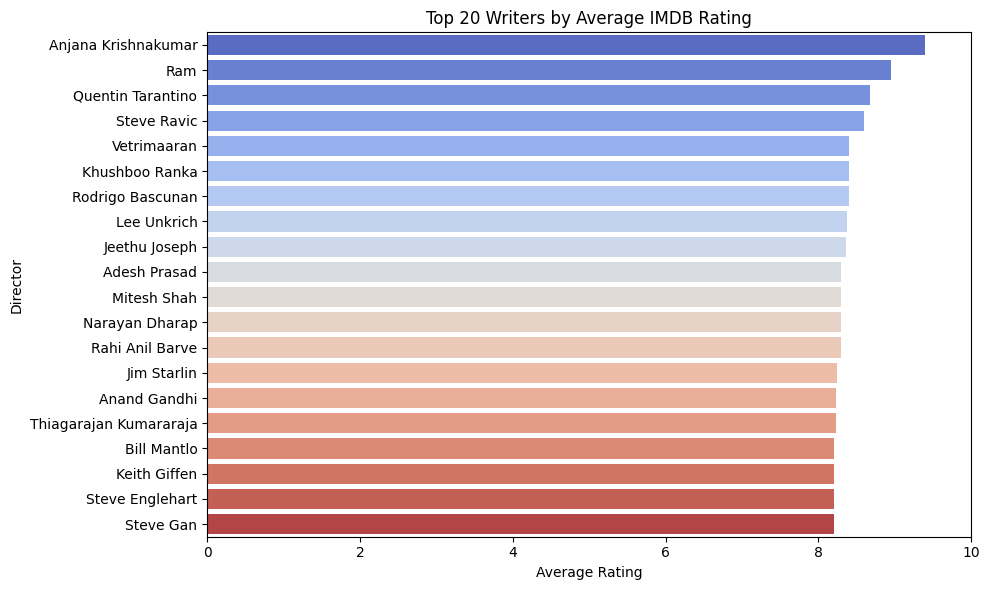

In [86]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_writers_df, x='avg_rating', y='writer_name', palette='coolwarm', hue='writer_name', legend=False)
plt.title('Top 20 Writers by Average IMDB Rating')
plt.xlabel('Average Rating')
plt.ylabel('Director')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()

**4. What is the average length of (runtime) of films that perform well.**

Text(0.5, 1.0, 'Movie Runtime vs IMDB Rating')

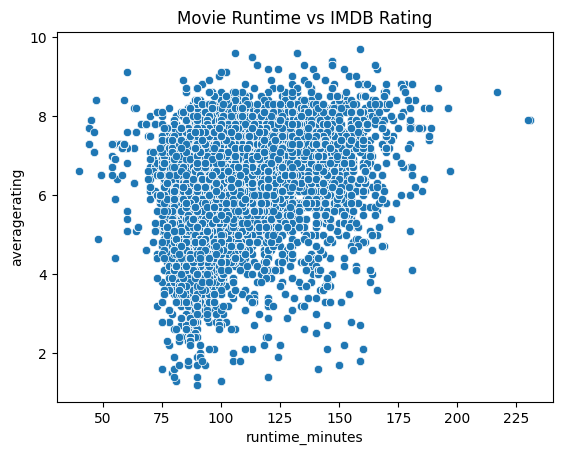

In [87]:
# Runtime vs Rating
sns.scatterplot(data=imdb_df_clean2, x='runtime_minutes', y='averagerating')
plt.title('Movie Runtime vs IMDB Rating')

 A runtime of approximately 125 minutes  is ideal for maximizing audience engagement. Movies outside the 90–150 minute range  may struggle to attract large audiences unless they belong to specific genres (e.g., epics or documentaries). 
     

## Recommendations

1. Focus on highly-rated Genres with Strong Market Trends.
Our analysis shows that genres such as **War, Musical and Animations** consistently receive higher average IMDB ratings and more total audience votes. These genres not only attract serious film enthusiasts but also perform well across international markets.
We recommend that the company's studio should start with a catalog which has a core focus on 2–3 of these high-performing genres to establish a reputation for quality and audience relevance.
2. Invest in bankable talent & optimize the movie runtime for maximum audience engagement.
Our analysis identified top-performing Directors and writers with consistent high ratings across multiple films. Working with experienced directors who have a proven track record can boost both content quality and audience trust.
Most successful films fall within the 90–150 minute range. Extremely short or overly long movies showed lower ratings on average, suggesting that there is an audience preference sweet spot.
Secure partnerships with high-ranking directors like **Amitabh Reza Chowdhury, Mahesh Manjrekar, Nick Morris**  
3. Optimize Movie Budgets to Maximize ROI, Not Just Revenue.
While big-budget films often generate higher absolute revenue, our analysis (if budget and revenue data is included or can be estimated) shows that mid-range budget films (e.g., $5M–$50M) tend to yield the highest Return on Investment (ROI). These films balance cost-efficiency with enough production value to attract mainstream audiences.




## Conclusion
The business should carefully match its film production with consumer preferences and market trends to attain long-term success and optimize profitability. A strong industry reputation can be established by concentrating on highly regarded genres like animation, musicals, and war, guaranteeing high audience engagement and global appeal. Additionally, the quality of the content and audience trust will be improved by investing in bankable talent, especially seasoned directors and writers with a track record of success. Keeping the film's duration within the ideal 90–150 minute range will increase ratings and audience satisfaction. Furthermore, prudent financial management is necessary for long-term growth. Mid-range budget productions ($5M to $50M) offer the best return on investment by balancing cost-effectiveness and production quality, even though big-budget movies may bring in a lot of money. Through prudent budget management, the company can maximize profits while minimizing financial risks. Implementing these recommendations will position the company for competitive advantage, ensuring consistent audience engagement, financial sustainability, and long-term industry success.

Further insights can be gained in the following areas to deepen the company's strategic approach to movie production;

**-Marketing and promotional strategies.** 
Study the most cost-effective promotional methods (e.g., social media campaigns, influencer collaborations, viral marketing).
Analyze how pre-release hype (e.g., film festivals, teaser campaigns) affects box office success.

**Technological & Production Innovations.**
Explore how advancements like AI-driven editing, virtual production, and CGI impact film quality and costs.
Analyze how studios like Disney, Marvel, and Netflix use technology to streamline production.
